In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
# import seaborn as sns
import numpy as np

In [ ]:
#https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/globe/land_ocean/1/0/1850-2024

In [4]:
df1 = pd.read_csv("/content/drive/My Drive/climate5April/GlobalTemp.csv",skiprows=4)

df1['Date'] = pd.to_datetime(df1['Date'].astype(str).str[:4] + '-' + df1['Date'].astype(str).str[4:], format='%Y-%m')

df1.head()

,Date,Anomaly
0,1850-01-01,-0.46
1,1850-02-01,-0.22
2,1850-03-01,-0.22
3,1850-04-01,-0.36
4,1850-05-01,-0.30


In [5]:
df1=df1.loc[df1['Date']>='2000-01-01']

In [6]:
df=df1

# Prophet fine tune

In [7]:
df1=df1.loc[df1['Date']>='2000-01-01']

In [8]:
df1.tail()

,Date,Anomaly
2088,2024-01-01,1.30
2089,2024-02-01,1.42
2090,2024-03-01,1.37
2091,2024-04-01,1.30
2092,2024-05-01,1.18


In [9]:
adf_result = adfuller(df1['Anomaly'])

adf_statistic = adf_result[0]
p_value = adf_result[1]
critical_values = adf_result[4]

is_stationary = p_value < 0.05

print(f"ADF Statistic: {adf_statistic}")
print(f"p-value: {p_value}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"   {key}: {value}")

if is_stationary:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

ADF Statistic: -1.9145280512338894
p-value: 0.32525782388457114
Critical Values:
   1%: -3.4531816058796143
   5%: -2.871593390724642
   10%: -2.5721268156511536
The time series is not stationary.


<Figure size 3600x6000 with 0 Axes>

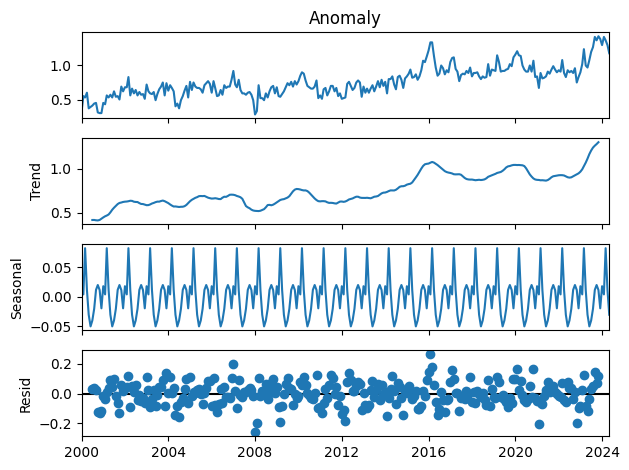

Trend Component:
Date
2000-01-01   NaN
2000-02-01   NaN
2000-03-01   NaN
2000-04-01   NaN
2000-05-01   NaN
Name: trend, dtype: float64

Seasonal Component:
Date
2000-01-01    0.017994
2000-02-01    0.004190
2000-03-01    0.082233
2000-04-01    0.011599
2000-05-01   -0.030194
Name: seasonal, dtype: float64

Residual Component:
Date
2000-01-01   NaN
2000-02-01   NaN
2000-03-01   NaN
2000-04-01   NaN
2000-05-01   NaN
Name: resid, dtype: float64


In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

df1.set_index('Date', inplace=True)

result = seasonal_decompose(df1['Anomaly'], model='additive', period=12)

plt.figure(figsize=(12, 20),dpi=300)
result.plot()
plt.show()

# Accessing the components
trend = result.trend
seasonal = result.seasonal
resid = result.resid

print("Trend Component:")
print(trend.head())
print("\nSeasonal Component:")
print(seasonal.head())
print("\nResidual Component:")
print(resid.head())

In [ ]:
df=df1

<ipython-input-11-529179ae8a0c>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y'] = scaler.fit_transform(train_df[['y']])
<ipython-input-11-529179ae8a0c>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['y'] = scaler.transform(test_df[['y']])


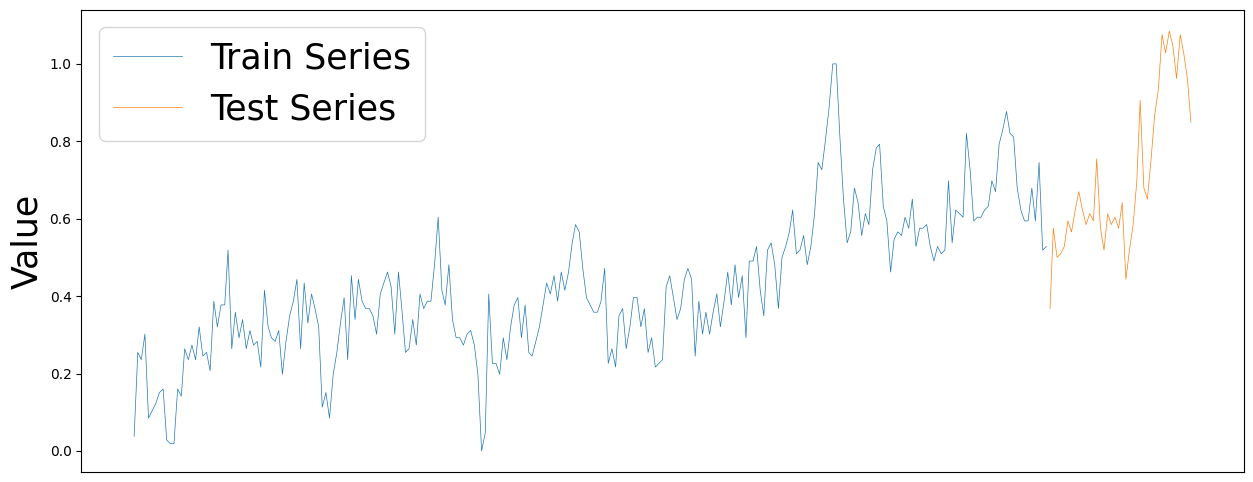

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp91cdr_df/guj1033j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp91cdr_df/tgtkobjy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9054', 'data', 'file=/tmp/tmp91cdr_df/guj1033j.json', 'init=/tmp/tmp91cdr_df/tgtkobjy.json', 'output', 'file=/tmp/tmp91cdr_df/prophet_model0jdjfgx1/prophet_model-20250405131117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:11:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/p

Default model error is: nan


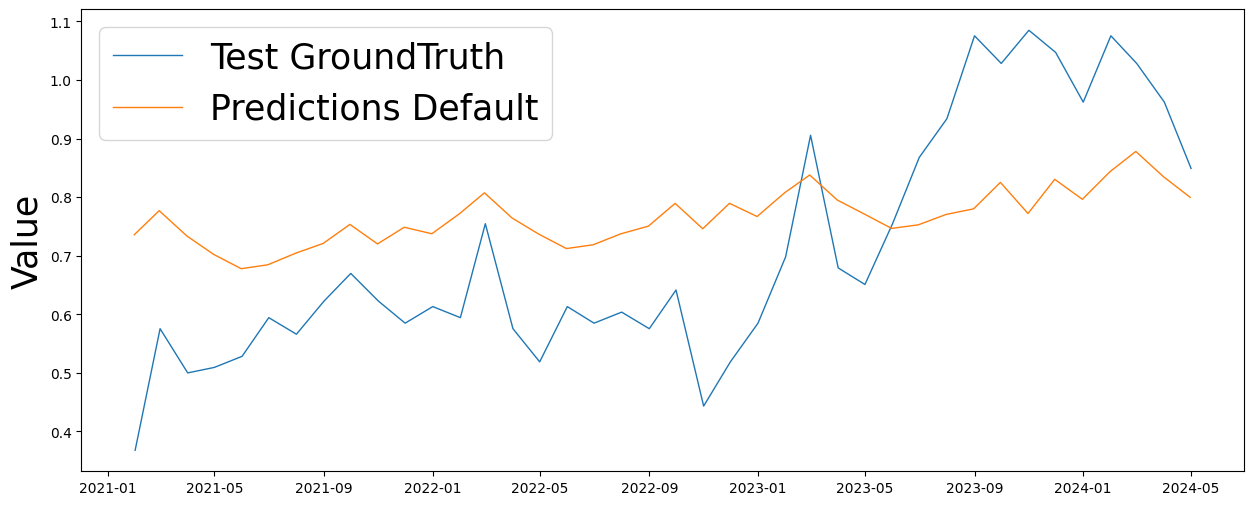

DEBUG:cmdstanpy:input tempfile: /tmp/tmp91cdr_df/81cu7bdh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp91cdr_df/jghtq5w9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46741', 'data', 'file=/tmp/tmp91cdr_df/81cu7bdh.json', 'init=/tmp/tmp91cdr_df/jghtq5w9.json', 'output', 'file=/tmp/tmp91cdr_df/prophet_modelt1b46w27/prophet_model-20250405131118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:11:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


MAPE error is: 26.98
MSE error is: 0.03693840288006115
RMSE error is: 0.1921936598331515
MAE error is: 0.16823740615105448
R² error is: 0.059707331430385535


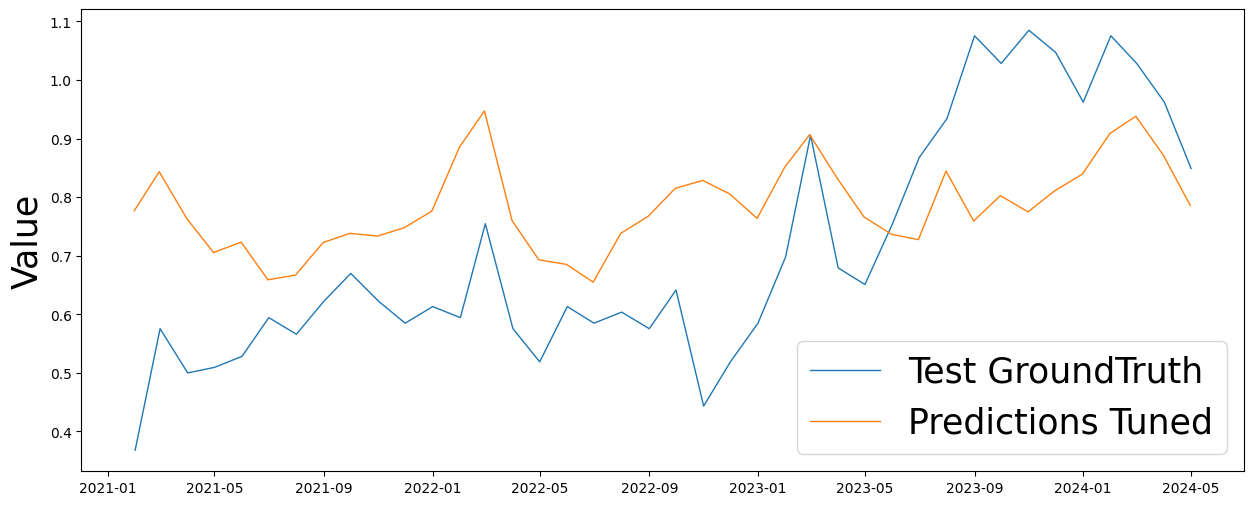

In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from matplotlib import pyplot as plt
from prophet import Prophet

df['ds'] = df['Date']
df['y'] = df['Anomaly']

Test_size = int(40)
train_df = df.head(len(df)-Test_size)
test_df = df.tail(Test_size)

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()

train_df['y'] = scaler.fit_transform(train_df[['y']])
test_df['y'] = scaler.transform(test_df[['y']])

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)

plt.plot(train_df['ds'], train_df['y'], linewidth=0.5, label="Train Series")
plt.plot(test_df['ds'], test_df['y'], linewidth=0.5, label="Test Series")

plt.legend(fontsize=25)
plt.ylabel('Value', fontsize=25)
plt.xticks([])
plt.show()

def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

model = Prophet()
model.fit(train_df)
future = model.make_future_dataframe(periods=Test_size, freq='M')
forecast = model.predict(future)
predictions = forecast.tail(Test_size)

error = mape(test_df['y'], predictions['yhat'])
print('Default model error is:', error)

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)

plt.plot(pd.to_datetime(test_df['ds']), test_df['y'], linewidth=1, label="Test GroundTruth")
plt.plot(pd.to_datetime(predictions['ds']), predictions['yhat'], linewidth=1, label="Predictions Default")

plt.legend(fontsize=25)
plt.ylabel('Value', fontsize=25)
plt.show()

model_tuned = Prophet(growth='linear',
                      daily_seasonality=True,
                      weekly_seasonality=True,
                      yearly_seasonality=True,
                      seasonality_mode='multiplicative')
model_tuned.fit(train_df)
future_tuned = model_tuned.make_future_dataframe(periods=Test_size, freq='M')
forecast_tuned = model_tuned.predict(future_tuned)
predictions_tuned = forecast_tuned.tail(Test_size)

test_df.reset_index(drop=True, inplace=True)
predictions_tuned.reset_index(drop=True, inplace=True)

error_mape = mape(test_df['y'], predictions_tuned['yhat'])
error_mse = mean_squared_error(test_df['y'], predictions_tuned['yhat'])
error_rmse = np.sqrt(error_mse)
error_mae = mean_absolute_error(test_df['y'], predictions_tuned['yhat'])
error_r2 = r2_score(test_df['y'], predictions_tuned['yhat'])

print('MAPE error is:', error_mape)
print('MSE error is:', error_mse)
print('RMSE error is:', error_rmse)
print('MAE error is:', error_mae)
print('R² error is:', error_r2)

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)

plt.plot(pd.to_datetime(test_df['ds']), test_df['y'], linewidth=1, label="Test GroundTruth")
plt.plot(pd.to_datetime(predictions_tuned['ds']), predictions_tuned['yhat'], linewidth=1, label="Predictions Tuned")

plt.legend(fontsize=25)
plt.ylabel('Value', fontsize=25)
plt.show()


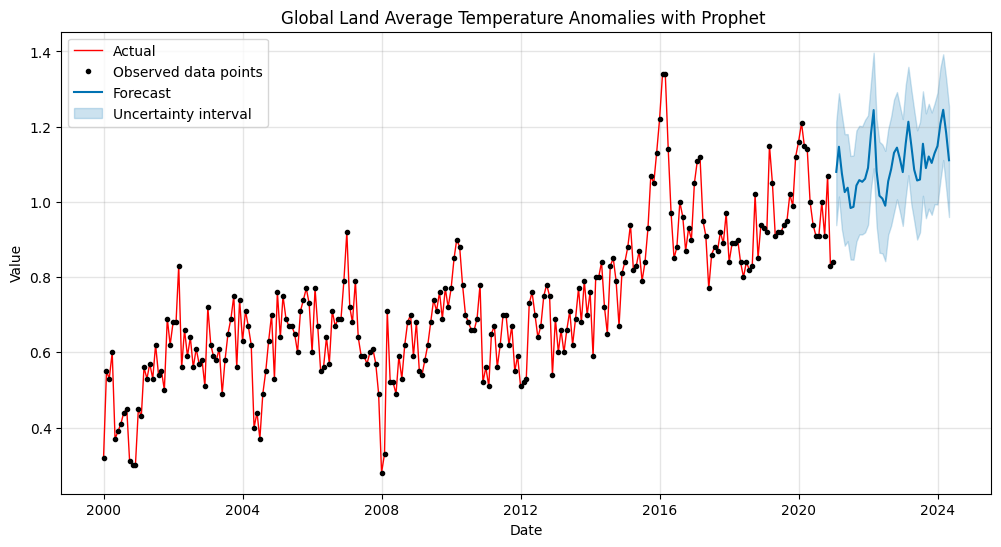

In [ ]:
from prophet.plot import plot

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(model_tuned.history['ds'], model_tuned.history['y'], color='red', linewidth=1, label='Actual')

plot(model_tuned, predictions_tuned, ax=ax, uncertainty=True)

plt.title('Global Land Average Temperature Anomalies with Prophet ')
plt.xlabel('Date')
plt.ylabel('Value')

plt.legend()

plt.show()

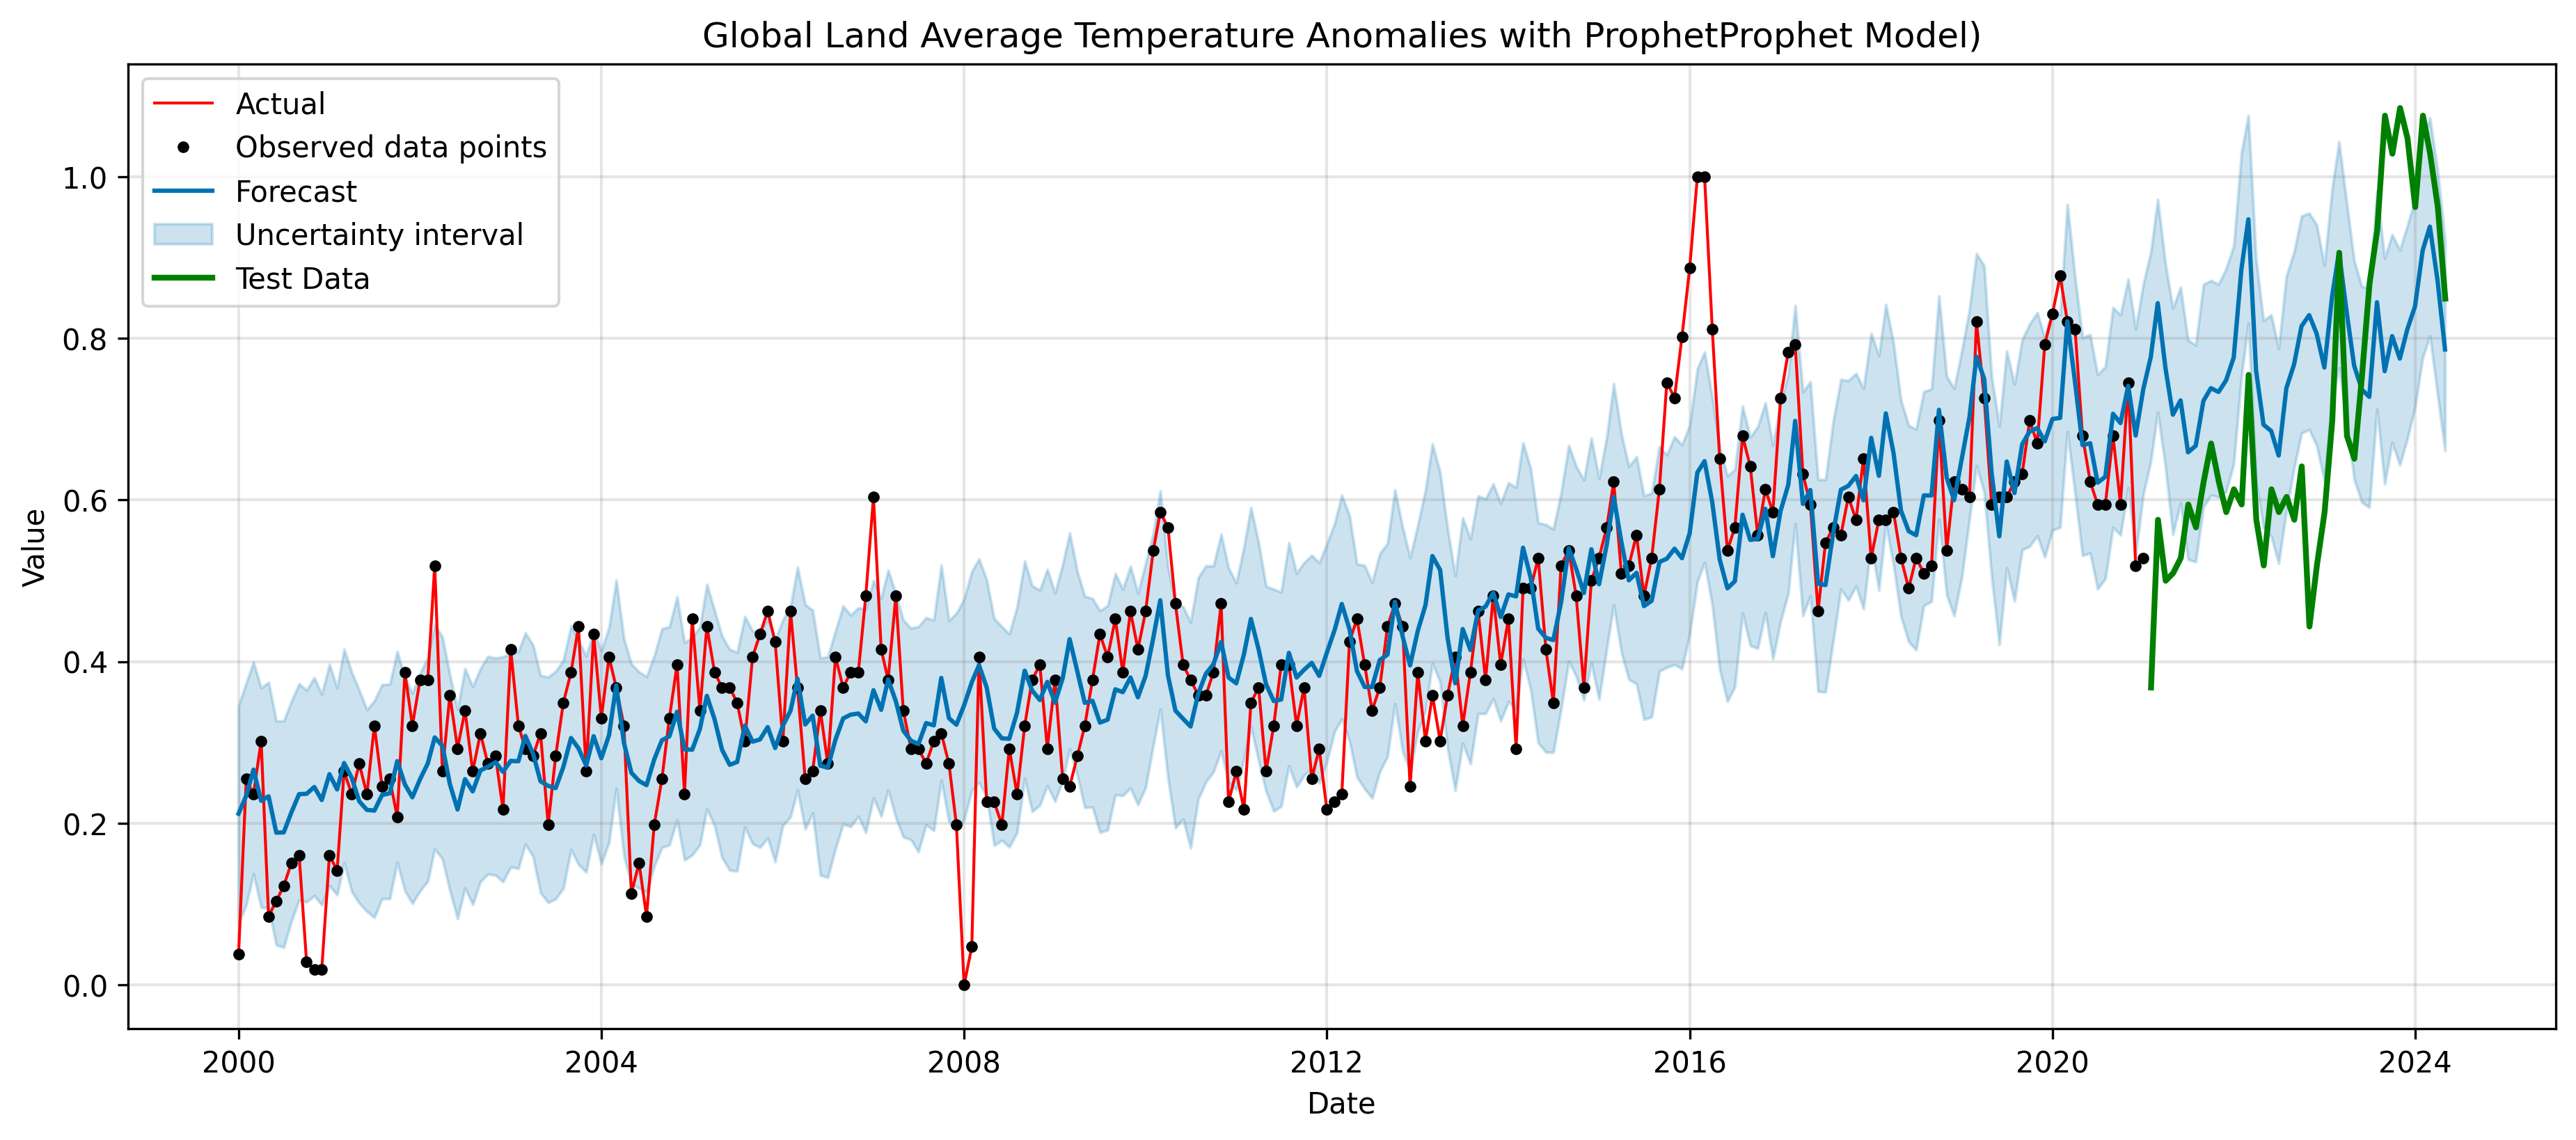

In [13]:
from prophet.plot import plot

fig, ax = plt.subplots(figsize=(15, 6),dpi=300)

ax.plot(model_tuned.history['ds'], model_tuned.history['y'], color='red', linewidth=1, label='Actual')

plot(model_tuned, forecast_tuned, ax=ax, uncertainty=True)
plt.plot(pd.to_datetime(test_df['ds']), test_df['y'], linewidth=2,color='Green', label="Test Data")
plt.title('Global Land Average Temperature Anomalies with ProphetProphet Model)')
plt.xlabel('Date')
plt.ylabel('Value')

plt.legend()

plt.show()

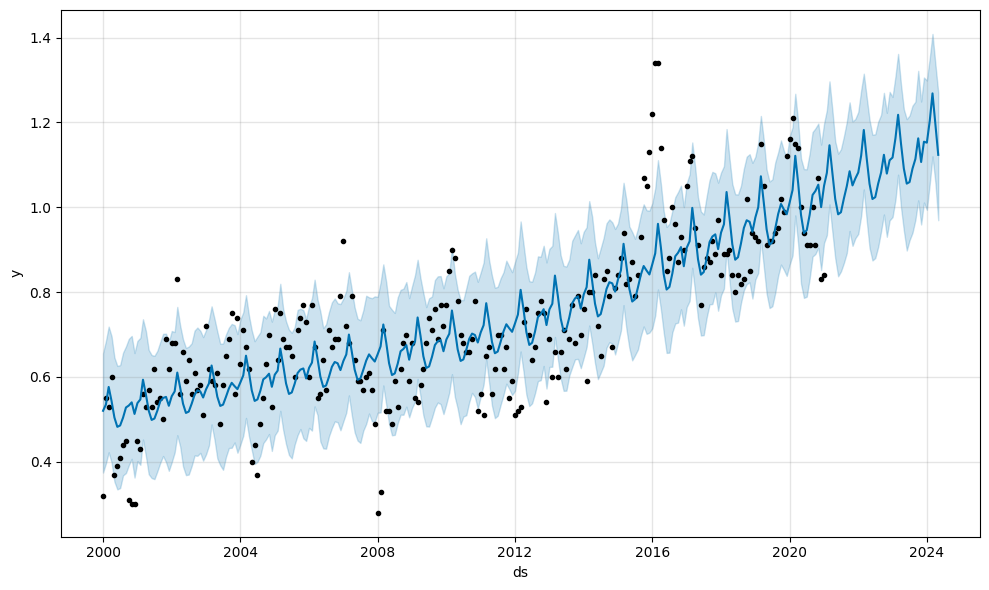

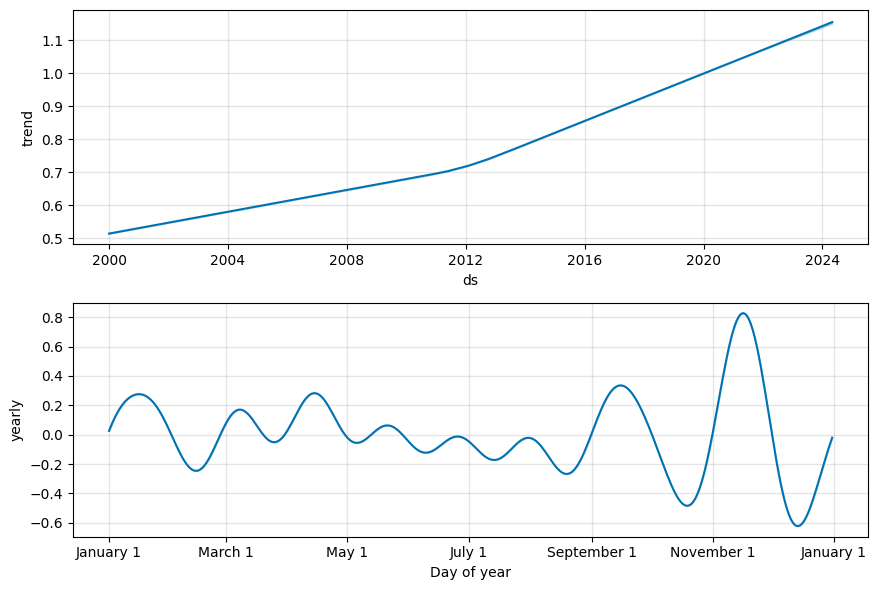

In [ ]:
from prophet.plot import plot, plot_components
from matplotlib import pyplot as plt

plot(model_tuned, forecast_tuned)               # Plot the forecast
plot_components(model, forecast_tuned)    # Plot the forecast components
plt.show()